In [713]:
#import packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage import feature
from scipy import ndimage as ndi
from skimage import data
from skimage import morphology
from skimage.filters import sobel


In [714]:
#Read an image from the CelebA dataset and display it
img=cv2.imread(r'D:\imagematting\img_align_celeba\014200.jpg')
cv2.imshow("image",img)
cv2.waitKey(0)

-1

In [715]:
#Convert to grayscale and display the result
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray",gray)
cv2.waitKey()

-1

61.0
202.0


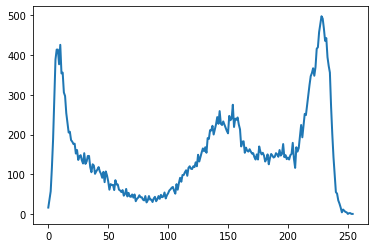

In [716]:
#plot the histogram of the grayscale image and obtain the quantile histogram values
hist = np.histogram(gray, bins=np.arange(0, 256))
plt.plot(hist[1][:-1], hist[0], lw=2)
x=np.quantile(hist[0], 0.25, axis=0)
print(x)
y=np.quantile(hist[0], 0.75, axis=0)
print(y)

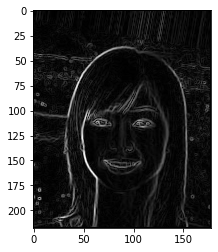

In [717]:
#apply sobel operator
elevation_map = sobel(gray)
plt.imshow(elevation_map , cmap=plt.cm.gray,interpolation='nearest')
plt.show()

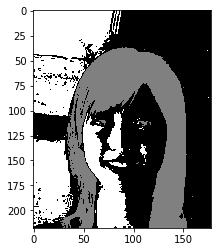

In [725]:
#Pepare masks based on the histogram quantile values and display the result
markers = np.zeros_like(gray)
markers[gray <x] = 1
markers[gray >y] = 2
plt.imshow(markers, cmap=plt.cm.gray,interpolation='nearest')
plt.show()

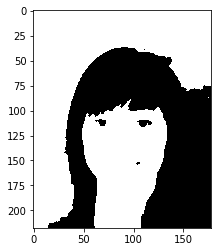

In [726]:
#Apply wateshed algorithm and display the image
seg = morphology.watershed(elevation_map, markers)
plt.imshow(seg, cmap=plt.cm.gray,interpolation='nearest')
plt.show()

In [728]:
#create a new matrix to save the column positions of all pixels in seg with value 1  
new_img=np.zeros_like(gray)
for i in range(0,218):
  for j in range(0,178):
    if seg[i,j]==1:
     new_img[i,j]=j

In [729]:
#Save the minimun and maximum values in  each row into k2 and k1 respectively
k1=np.zeros(218)
k2=np.zeros(218)
check=np.zeros(178)
for i in range(0,218):
    k1[i]=np.max((new_img[i,:]))
for i in range(0,218):
    if np.array_equal(new_img[i,:],check):
        k2[i]=0
    else:
         k2[i]=np.min(np.nonzero(new_img[i,:]))

In [730]:
#display the foregrounfd image
cv2.imshow("image",newimg2)
cv2.waitKey(0)

-1